# Guide Line for gradient_input

In [5]:
import os
import pandas as pd
import numpy as np
import prediction_painter
import import_ipynb
from model_dev import rmse
from gradient_input import GradientInput

importing Jupyter notebook from model_dev.ipynb


## Begin with log file

In [2]:
df_log = pd.read_csv("Log/Models.csv", index_col=0)
df_log['Model_path'] = df_log['Model_path'].apply(lambda x: x.replace('C:\\Users\\wasin\\Downloads\\Work\\PG(HKU)\\FYP\\Program_Data\\',''))

In [3]:
df_log.tail(10)

,Time,Model_path,Algorithm,Loss,Validation Loss,Country,Features
473,20211024 01-15,Models\20211024 01-15C-LSTM,C-LSTM,0.000320,0.001139,India,PC
474,20211024 01-29,Models\20211024 01-29LSTM,LSTM,0.004262,0.000847,India,PCS
475,20211024 01-29,Models\20211024 01-29Attention,Attention,0.004431,0.003863,India,PCS
476,20211024 01-29,Models\20211024 01-29C-LSTM,C-LSTM,0.000909,0.013219,India,PCS
477,20211025 16-09,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,LSTM,0.003321,0.067072,United States,P
478,20211025 16-09,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,Attention,0.048227,0.095816,United States,P
479,20211025 16-09,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,C-LSTM,0.003542,0.124102,United States,P
480,20211025 18-24,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,LSTM,0.002434,0.144472,United States,PC
481,20211025 18-24,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,Attention,0.048537,0.096698,United States,PC
482,20211025 18-24,E:\Allen\HKU\Capstone\COVID-19-Capstone-projec...,C-LSTM,0.005063,0.093837,United States,PC


##### Reshape and MinMaxScale input #####
(536, 14, 28) (536, 7, 1) (60, 14, 28) (60, 7, 1)


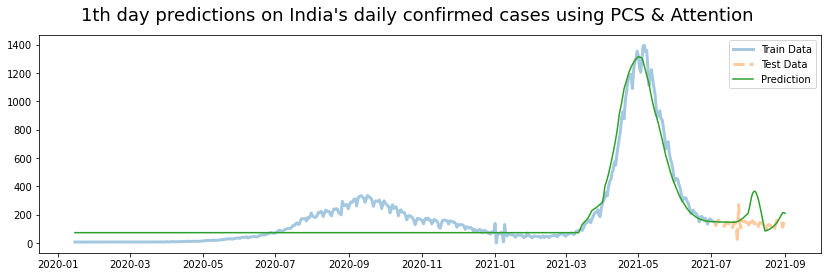

In [6]:
algo, model_path, f_flag, country = prediction_painter.plot_from_dataframe(df_log,475,custom_objects= dict(loss=rmse))

## Create GradientInput object

In [7]:
India_gradient = GradientInput(algo, model_path, f_flag, country)

##### Reshape and MinMaxScale input #####
(536, 14, 28) (536, 7, 1) (60, 14, 28) (60, 7, 1)
Attention Models\20211024 01-29Attention PCS India
X shape: (596, 14, 28)  y shape: (596, 7, 1)
Date Range:1/1/2020~1/9/2021


## Check '1/7/2021' 

 17%|█████████████▎                                                                 | 169/1000 [00:07<00:37, 21.94it/s]


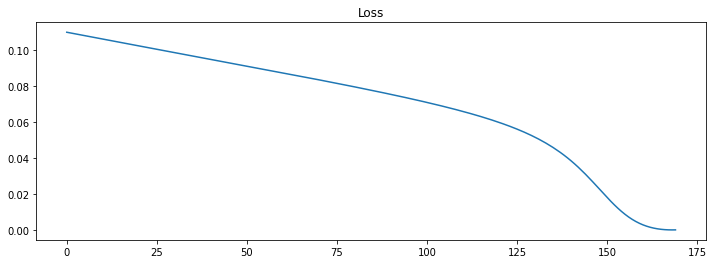

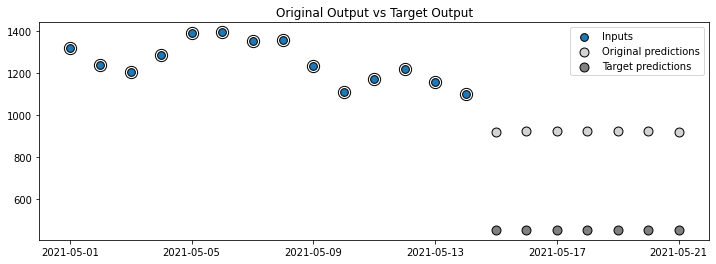

In [12]:
df_gradiented = India_gradient.gradient_input('1/5/2021', ratio = 0.5, step = 1000, learning_rate = 5e-3)

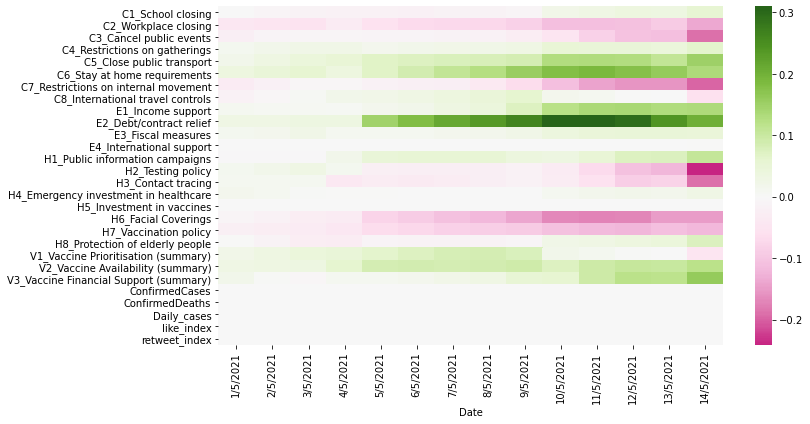

In [13]:
India_gradient.plot_guided_input()